The description of data can be found here:
http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

Attribute Information:
1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [1]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [23]:
## Data can be downloaded from: http://archive.ics.uci.edu/ml/machine-learning-databases/00235/
## Just open the zip file and grab the file 'household_power_consumption.txt' put it in the directory 
## that you would like to run the code. 


df = pd.read_csv('../input/household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

- The data includes 'nan' and '?' as a string. Both have been converter to numpy nan in importing stage (above) and treated the same. 

- Merged two columns 'Date' and 'Time' to 'dt'. 

- Converted the data to time-series type, by taking index to be the time. 

In [24]:
df.head(15) 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [26]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [27]:
df.shape

(2075259, 7)

In [28]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [29]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

## Dealing with missing values  'nan' 

In [30]:
## finding all columns that have nan:
df_null=df.isnull().sum()
df_null[df_null!=0]

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [31]:
df=df.fillna(df.mean())# filling nan with mean in any columns

In [32]:
df_null=df.isnull().sum()
df_null[df_null!=0]

Series([], dtype: int64)

# Data visualization

## * Below I resample over day, and show the sum and mean of Global_active_power. It is seen that mean and sum of resampled data set, have similar structure.

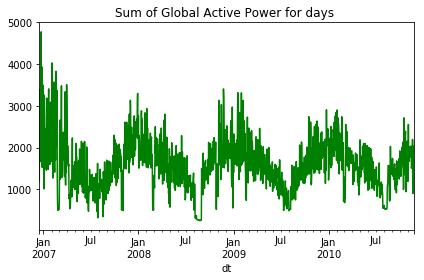

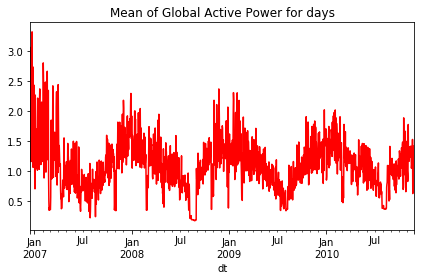

In [36]:
df.Global_active_power.resample('D').sum().plot(title='Sum of Global Active Power for days ',color='green') 
plt.tight_layout()
plt.show()  

df.Global_active_power.resample('D').mean().plot(title='Mean of Global Active Power for days', color='red') 
plt.tight_layout()
plt.show()

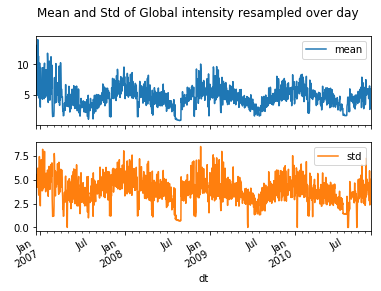

In [40]:
### mean and std of 'Global_intensity' resampled over day 
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Mean and Std of Global intensity resampled over day')
plt.show()

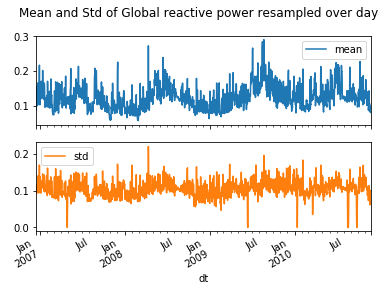

In [43]:
### mean and std of 'Global_reactive_power' resampled over day
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Mean and Std of Global reactive power resampled over day')
plt.show()

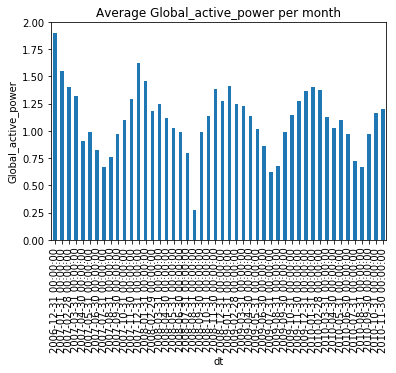

In [46]:
### Sum of 'Global_active_power' resampled over month
df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Global_active_power')
plt.title('Average Global_active_power per month')
plt.show()

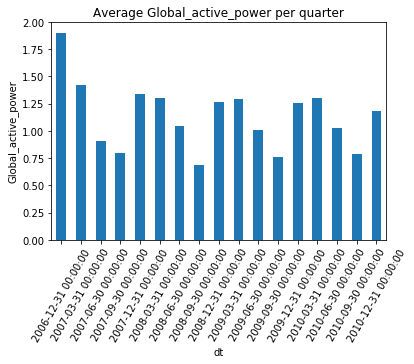

In [47]:
## Mean of 'Global_active_power' resampled over quarter
df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Average Global_active_power per quarter')
plt.show()

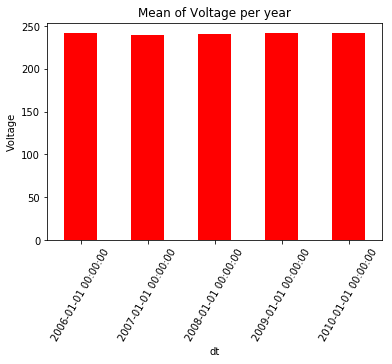

In [57]:
## mean of 'Voltage' resampled over year
df['Voltage'].resample('AS').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Mean of Voltage per year')
plt.show()

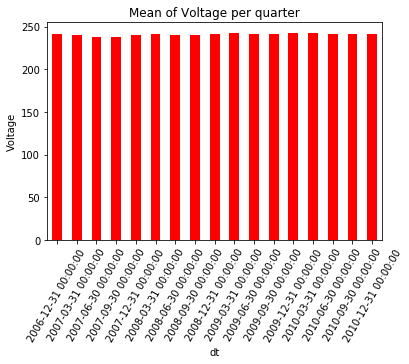

In [61]:
## mean of 'Voltage' resampled over month
df['Voltage'].resample('Q').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Mean of Voltage per quarter')
plt.show()

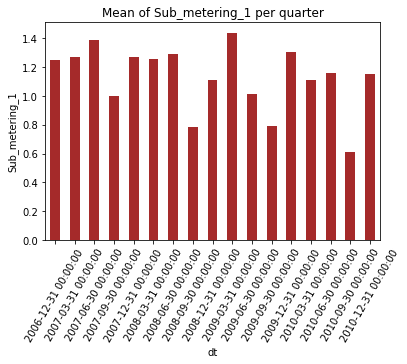

In [60]:
df['Sub_metering_1'].resample('Q').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Mean of Sub_metering_1 per quarter')
plt.show()

  It is seen from the above plots that the mean of 'Volage' over quarter is pretty much constant compared to other features. 

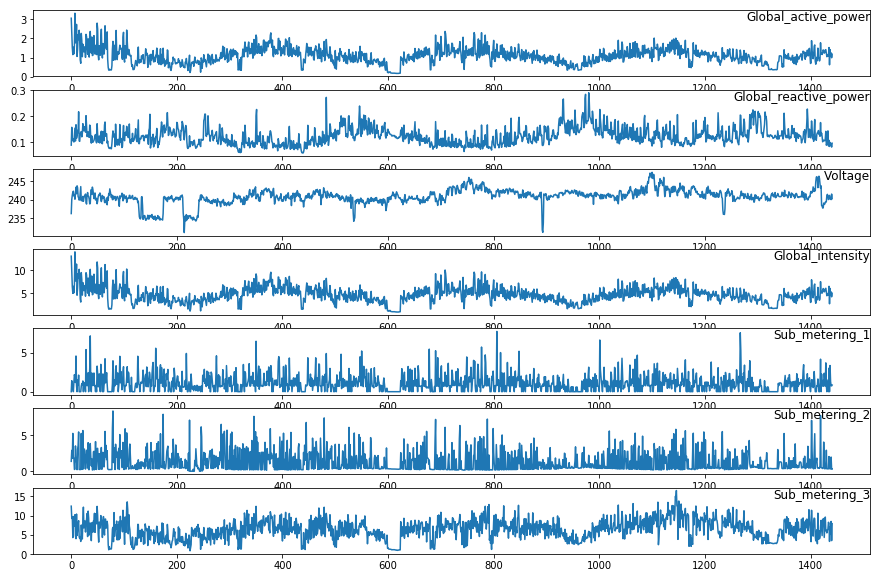

In [94]:
# Below I compare the mean of different features resampled over day. 
# specify columns to plot
cols = [0, 1, 2, 3,4,5, 6]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

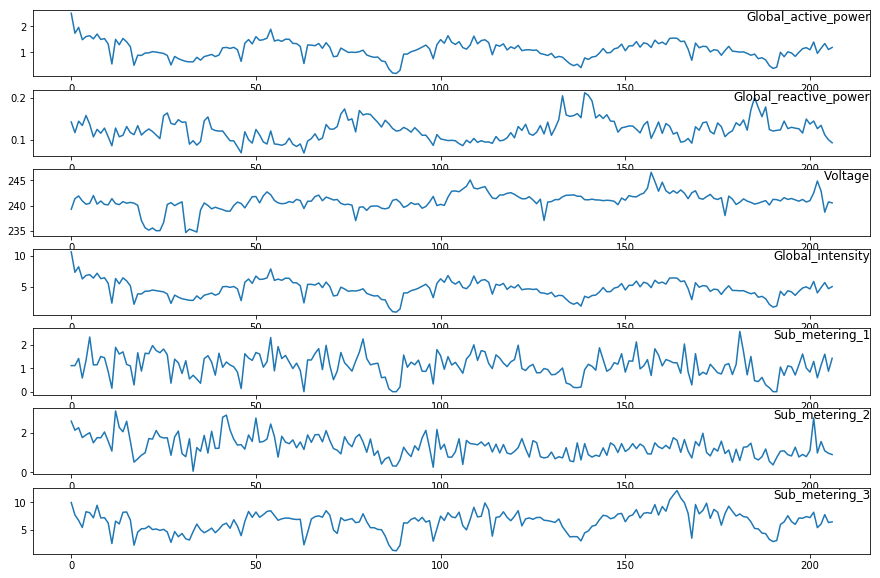

In [95]:
## resampling over week and computing mean
cols = [0, 1, 2, 3,4, 5, 6]
i = 1
groups=cols
values = df.resample('W').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1

plt.show()

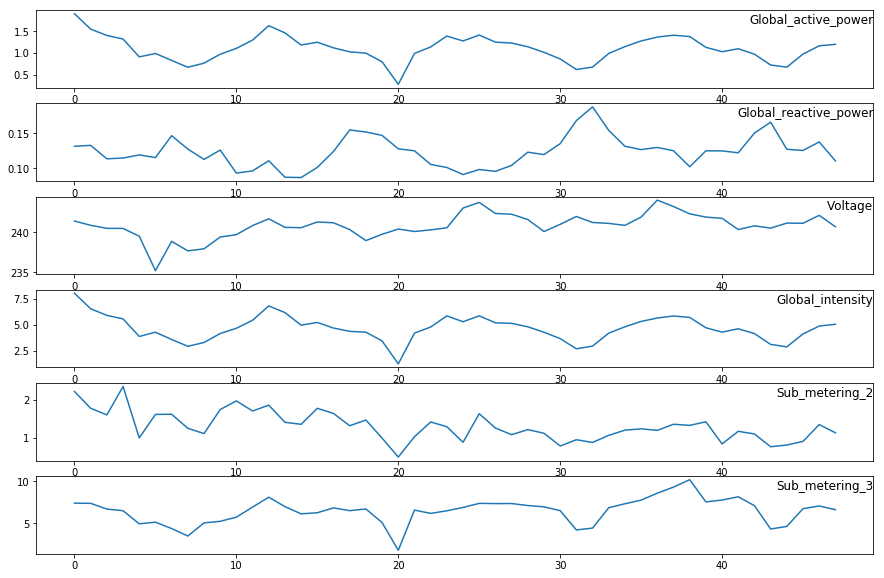

In [91]:
## resampling over month and computing mean
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = df.resample('M').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1

plt.show()

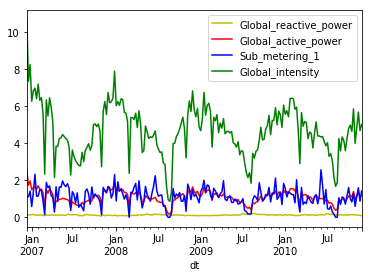

In [75]:
## resampling over week and computing mean
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

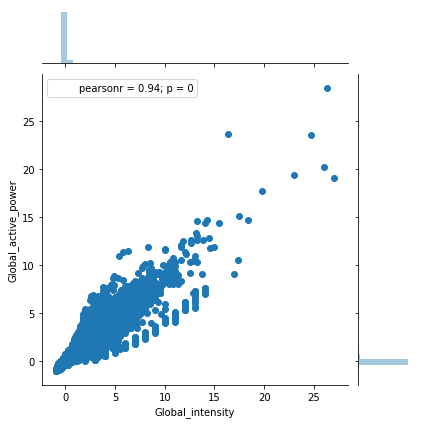

In [78]:
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  

plt.show()

### * From above two plots it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated. This is important observation for machine learning purpose. 

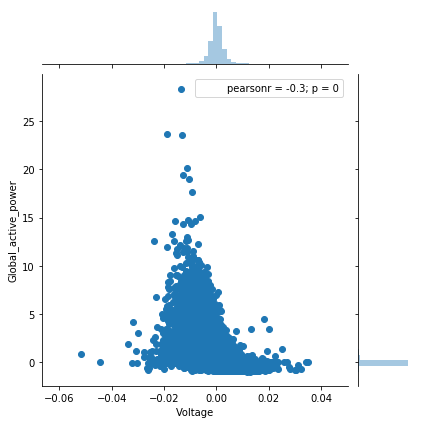

In [79]:
## The correlations between 'Voltage' and  'Global_active_power'
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()

From above two plots it is seen that 'Global_intensity' and 'Global_active_power'  are highly correlated. But 'Voltage', 'Global_active_power' are less correlated. This is important observation for machine learning purpose.

# Correlations among features

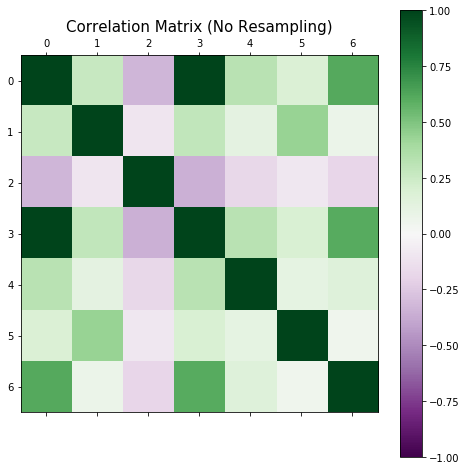

In [99]:
# Correlations among columns
plt.figure(figsize=(8,8))
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn',fignum=1)
plt.title('Correlation Matrix (No Resampling)', size=15)
plt.colorbar()
plt.show()

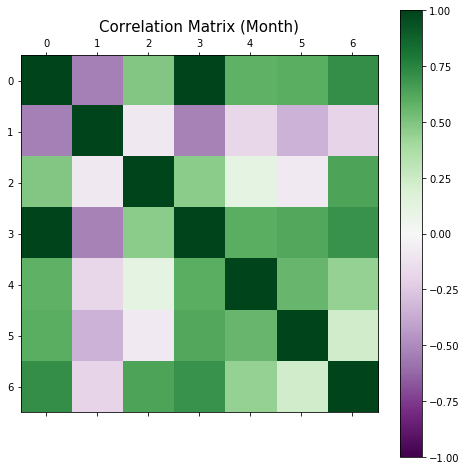

In [103]:
# Correlations of mean of features resampled over months
plt.figure(figsize=(8,8))
plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn',fignum=1)
plt.title('Correlation Matrix (Month)', size=15)
plt.colorbar()
plt.margins(0.02)


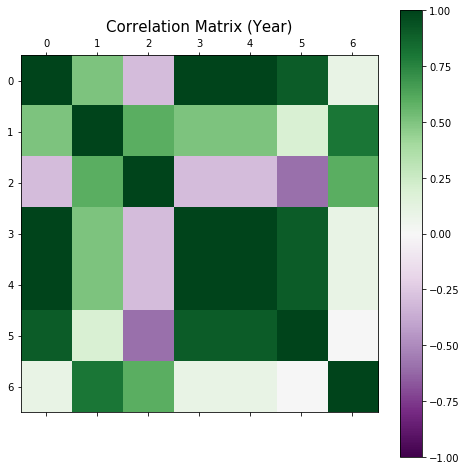

In [102]:
plt.figure(figsize=(8,8))
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn',fignum=1)
plt.title('Correlation Matrix (Year)', size=15)
plt.colorbar()
plt.show()

 It is seen from above that with resampling techniques one can change the correlations among features. This is important for feature  engineering.

# Machine-Leaning: LSTM Data Preparation and feature engineering

#####  I will frame the supervised learning problem as predicting the **Global_active_power** at the current time (t) given the Global_active_power measurement and other features at the prior time step.

In [108]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 

In order to reduce the computation time, and also get a quick result to test the model.  One can resmaple the data over** hour** (the original data are given in minutes). This will reduce the size of data from **2075259** to **34589 **but keep the overall strucure of data as shown in the above.   

In [109]:
## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [112]:
values = df_resample.values 
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283801   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315988   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)   var2(t)   var3(t)   var4(t)  var5(t)   var6(t)  \
1   0.782418  0.545045  0.103358  0.335501  0.541487      0.0  0.144652   
2   0.782676  0.509006  0.110073  0.283801  0.502152      0.0  0.030869   
3   0.774169  0.488550  0.096987  0.315988  0.481110      0.0  0.000000   
4   0.778809  0.455597  0.099010  0.434417  0.449904      0.0  0.008973   
5   0.798917  0.322555  0.072536  0.495847  0.323529      0.0  0.002872   

    var7(t)  
1  0.782676  
2  0.774169  
3  0.778809  
4  0.798917  
5  0.205723  


In [113]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283801   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315988   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)  
1   0.782418  0.545045  
2   0.782676  0.509006  
3   0.774169  0.488550  
4   0.778809  0.455597  
5   0.798917  0.322555  


Above I showed 7 input variables (input series) and the 1 output variable for 'Global_active_power' at the current  time in hour (depending on resampling). 

# Splitting the rest of data to train and validation sets

In [114]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(8760, 1, 7) (8760,) (25828, 1, 7) (25828,)


# Model architecture

### 1)  LSTM with 100 neurons in the first visible layer 
### 3) Dropout 20%
### 4) 1 neuron in the output layer for predicting Global_active_power. 
### 5) The model will be fit for 20 training epochs with a batch size of 70.


Train on 8760 samples, validate on 25828 samples
Epoch 1/20
 - 2s - loss: 0.0191 - val_loss: 0.0120
Epoch 2/20
 - 1s - loss: 0.0125 - val_loss: 0.0106
Epoch 3/20
 - 1s - loss: 0.0115 - val_loss: 0.0098
Epoch 4/20
 - 1s - loss: 0.0108 - val_loss: 0.0093
Epoch 5/20
 - 1s - loss: 0.0106 - val_loss: 0.0092
Epoch 6/20
 - 1s - loss: 0.0106 - val_loss: 0.0092
Epoch 7/20
 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 8/20
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 9/20
 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 10/20
 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 11/20
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 12/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 13/20
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 14/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 15/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 16/20
 - 1s - loss: 0.0104 - val_loss: 0.0092
Epoch 17/20
 - 1s - loss: 0.0104 - val_loss: 0.0092
Epoch 18/20
 - 1s - loss: 0.0104 - val_loss: 0.0091
Epoch 19/20
 - 1s - loss

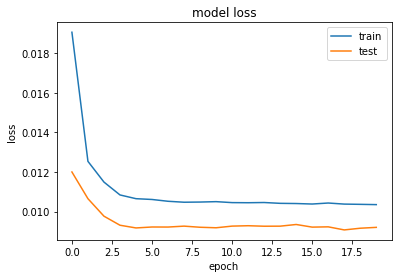

In [118]:

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()



In [119]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.617


### Note that in order to improve the model, one has to adjust epochs and batch_size.

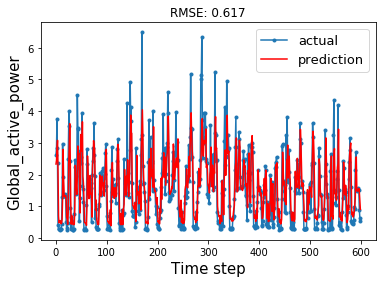

In [129]:
## for a demonstration purpose, I only compare the predictions in 600 hours. 
aa=[x for x in range(600)]
plt.plot(aa, inv_y[:600], marker='.', label="actual")
plt.plot(aa, inv_yhat[:600], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=13)
plt.title('RMSE: 0.617')
plt.show()

# Final remarks

### * Here I have used the LSTM neural network which is now the state-of-the-art for sequencial problems. 

### * In order to reduce the computation time, and get some results quickly, I took the first year of data (resampled over hour) to train the model and the rest of data to test the model.  

### * I put together a very simple LSTM neural-network to show that one can obtain reasonable predictions. However numbers of rows is too high and as a result the computation is very time-consuming (even for the simple model in the above it took few mins to be run on  2.8 GHz Intel Core i7).  
  